In [ ]:
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [ ]:
base_path = "/SNS/VENUS/IPTS-35945/shared/jean/chips_alignment/"
assert os.path.exists(base_path), f"Directory does not exist: {base_path}"

image1 = os.path.join(base_path, "normalized_sample_8997_obs_8999/integrated.tif")
assert os.path.exists(image1), f"File does not exist: {image1}"

image2 = os.path.join(base_path, "normalized_sample_8998_obs_8999/integrated.tif")
assert os.path.exists(image2), f"File does not exist: {image2}"


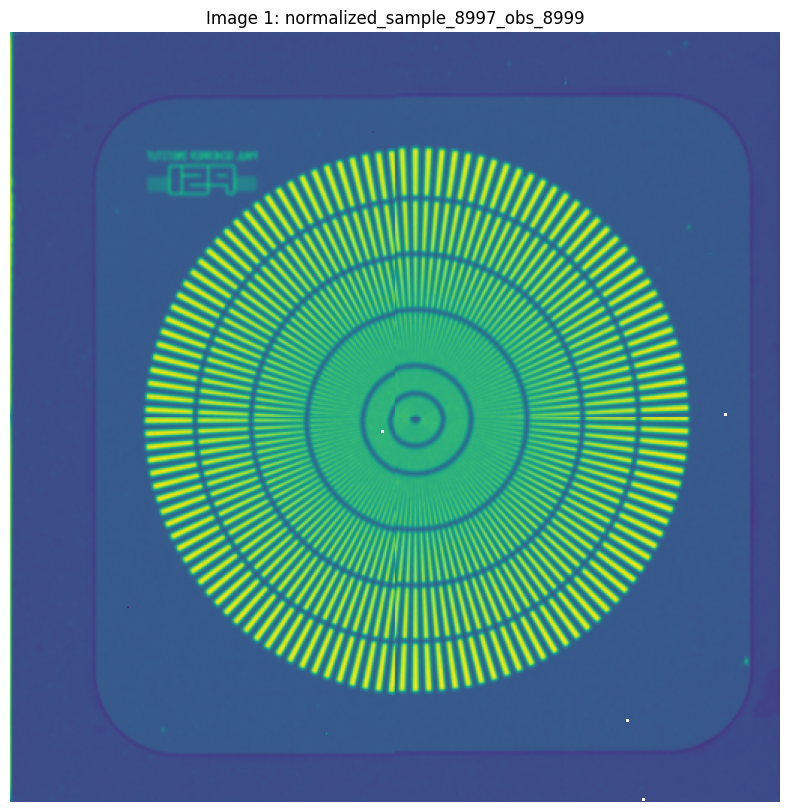

In [ ]:
data_image1 = np.array(Image.open(image1))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data_image1)
ax.set_title("Image 1: normalized_sample_8997_obs_8999")
ax.axis('off')
plt.show()

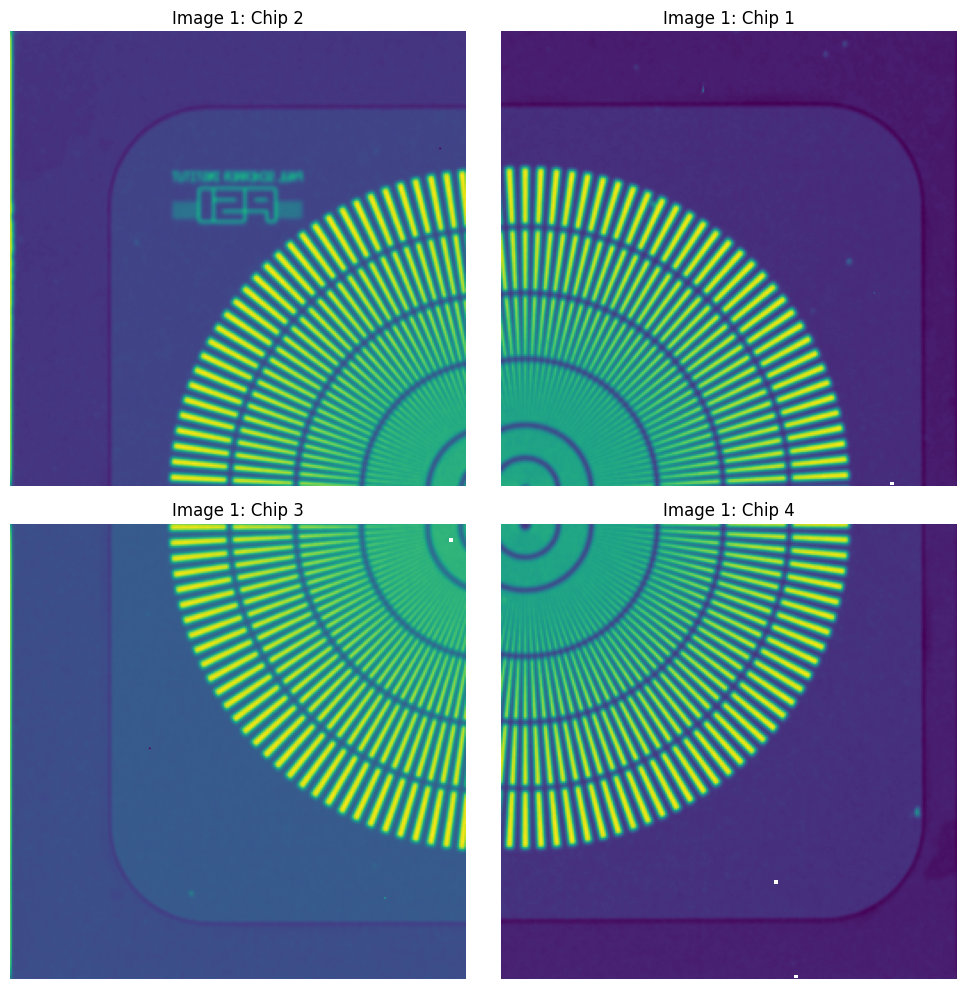

In [ ]:
data_image1_chip1 = data_image1[0:256, 256:]
data_image1_chip2 = data_image1[0:256, 0:256]
data_image1_chip3 = data_image1[256:, 0:256]
data_image1_chip4 = data_image1[256:, 256:]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 1].imshow(data_image1_chip1)
axs[0, 0].imshow(data_image1_chip2)
axs[1, 0].imshow(data_image1_chip3)
axs[1, 1].imshow(data_image1_chip4)
axs[0, 1].set_title("Image 1: Chip 1")
axs[0, 0].set_title("Image 1: Chip 2")
axs[1, 0].set_title("Image 1: Chip 3")
axs[1, 1].set_title("Image 1: Chip 4")
axs[0, 1].axis('off')
axs[0, 0].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')

plt.tight_layout()

In [ ]:
# export the chips to files
output_dir = os.path.join(base_path, "chips")
os.makedirs(output_dir, exist_ok=True)

Image.fromarray(data_image1_chip1).save(os.path.join(output_dir, "chip1.tif"))
Image.fromarray(data_image1_chip2).save(os.path.join(output_dir, "chip2.tif"))
Image.fromarray(data_image1_chip3).save(os.path.join(output_dir, "chip3.tif"))
Image.fromarray(data_image1_chip4).save(os.path.join(output_dir, "chip4.tif"))

New image size: 512 x 514
[0.9391278  0.81512266 0.65496975 0.56670594 0.58692235 0.70139855
 0.8612411  0.95246154 0.94309413 0.8250273  0.66294557 0.5754369
 0.586954   0.70665276 0.863263   0.95534384        nan        nan
 0.6689517  0.5775072  0.5935946  0.7077271  0.86130875 0.9482917
 0.9312773  0.8058395  0.6443889  0.5676982  0.59907156 0.7333467
 0.890811   0.9544205  0.91174775 0.76540214 0.61965513 0.569834
 0.6310479  0.7819358  0.9196752  0.9576334  0.8836831  0.72842467
 0.5983094  0.57585174 0.65642697 0.8151943  0.94018    0.95588815
 0.86456305 0.70452756]


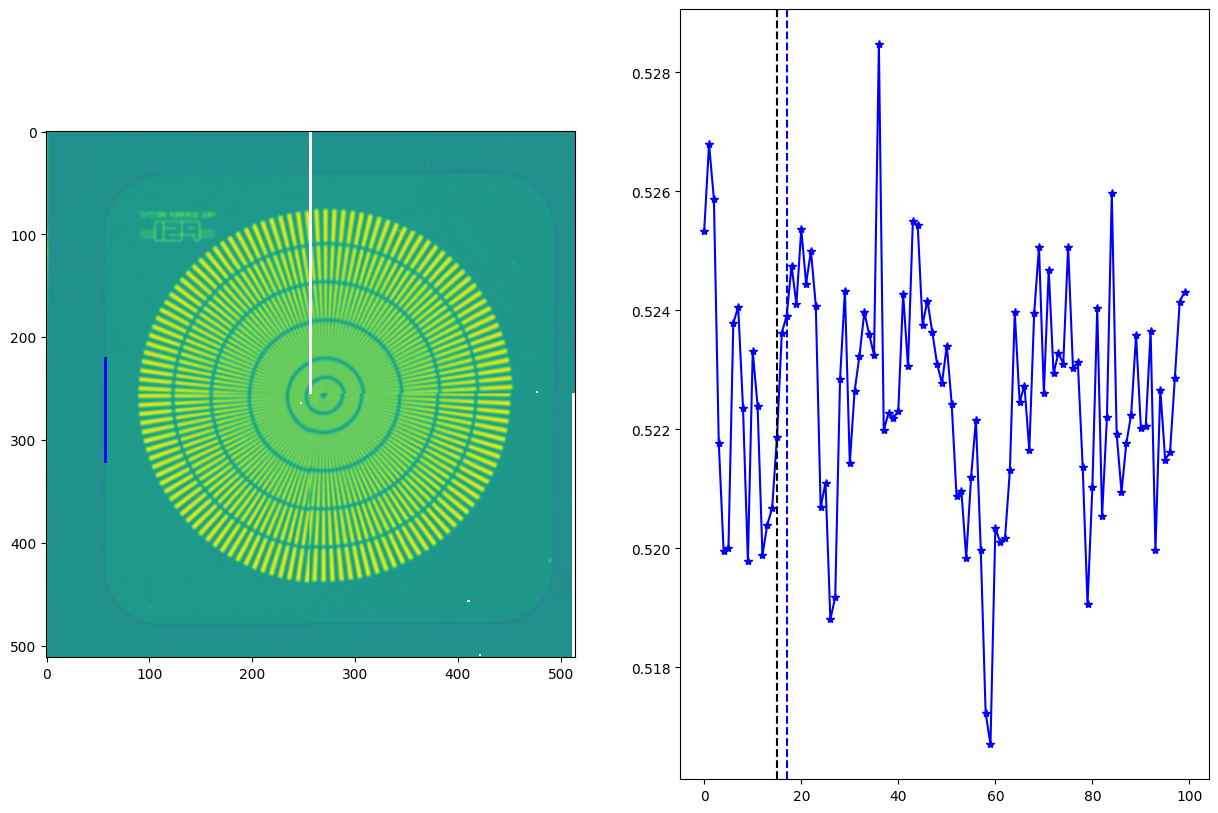

In [ ]:
chip1 = {'xoff': 1, 'yoff': 1}
# chip2 is our reference chip
chip3 = {'xoff': 0, 'yoff': 1}
chip4 = {'xoff': 1, 'yoff': 2}

profile1 = {'x0': 240, 'y0': 100, 'width': 50, 'height': 1}
profile2 = {'x0': 57, 'y0': 220, 'width': 1, 'height': 100}

height, width = data_image1.shape
new_height = 512 + np.max([chip1['yoff'], chip3['yoff'], chip4['yoff']])
new_width = 512 + np.max([chip1['xoff'], chip3['xoff'], chip3['xoff']])
print(f"New image size: {new_height} x {new_width}")

data_image1_corrected = np.empty((new_height, new_width), dtype=data_image1.dtype)
data_image1_corrected.fill(np.nan)
data_image1_corrected[0:256, 0:256] = data_image1_chip2
data_image1_corrected[0:256, 256+chip1['xoff']:256+chip1['xoff']+256] = data_image1_chip1
data_image1_corrected[256+chip3['yoff']:256+chip3['yoff']+256, 0:256] = data_image1_chip3
data_image1_corrected[256+chip4['yoff']:256+chip4['yoff']+256, 256+chip4['xoff']:256+chip4['xoff']+256] = data_image1_chip4

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axs[0].imshow(data_image1_corrected, vmin=0, vmax=1)
# axs[0].plot([profile1['x0'], profile1['x0'] + profile1['width']], [profile1['y0'], profile1['y0']], color='red', linewidth=2)
axs[0].plot([profile2['x0'], profile2['x0']], [profile2['y0'], profile2['y0'] + profile2['height']], color='blue', linewidth=2  )
# axs[1].plot(data_image1_corrected[profile1['y0'], profile1['x0']:profile1['x0'] + profile1['width']], '*-', color='red')
axs[1].plot(data_image1_corrected[profile2['y0']:profile2['y0'] + profile2['height'], profile2['x0']], '*-', color='blue')
axs[1].axvline(255 - profile1['x0'], color='black', linestyle='--')
axs[1].axvline(255 + chip1['xoff'] - profile1['x0'], color='blue', linestyle='--')

data_to_fit = data_image1_corrected[profile1['y0'], profile1['x0']:profile1['x0'] + profile1['width']]
print(data_to_fit)

